In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Reading and Understanding Data

In [3]:
data = pd.read_csv('datafile.csv')
data.head(10)

Sector  Year      Name  Andhra Pradesh  Arunachal Pradesh  Assam  \
0        Rural  2011   January           104.0                NaN  104.0   
1        Urban  2011   January           103.0                NaN  103.0   
2  Rural+Urban  2011   January           103.0                NaN  104.0   
3        Rural  2011  February           107.0                NaN  105.0   
4        Urban  2011  February           106.0                NaN  106.0   
5  Rural+Urban  2011  February           105.0                NaN  105.0   
6        Rural  2011     March           103.1                NaN  103.8   
7        Urban  2011     March           103.6                NaN  104.6   
8  Rural+Urban  2011     March           108.0                NaN  105.0   
9        Rural  2011     April           105.0                NaN  106.0   

   Bihar  Chattisgarh  Delhi    Goa  ...  Uttar Pradesh  Uttarakhand  \
0    NaN        105.0    NaN  103.0  ...          103.0          NaN   
1    NaN        104.0    NaN  103.0  ...          103.0          NaN   
2    NaN        104.0    NaN  103.0  ...          103.0          NaN   
3    NaN        107.0    NaN  105.0  ...          104.0          NaN   
4    NaN        106.0    NaN  105.0  ...          105.0          NaN   
5    NaN        105.0    NaN  104.0  ...          104.0          NaN   
6    NaN        103.9    NaN  103.9  ...          103.9          NaN   
7    NaN        104.3    NaN  104.3  ...          105.3          NaN   
8    NaN        108.0    NaN  106.0  ...          105.0          NaN   
9    NaN        105.0    NaN  104.0  ...          103.0          NaN   

  West Bengal  Andaman and Nicobar  Chandigarh  Dadra and Nagar Haveli  \
0       104.0                105.0       104.0                   104.0   
1       104.0                105.0       103.0                   104.0   
2       104.0                106.0       103.0                   104.0   
3       107.0                105.0       104.0                   107.0   
4       108.0                104.0       103.0                   106.0   
5       107.0                104.0       103.0                   106.0   
6       104.8                106.8       103.9                   105.8   
7       105.2                107.9       104.6                   106.2   
8       108.0                105.0       105.0                   108.0   
9       107.0                104.0       103.0                   105.0   

   Daman and Diu  Jammu and Kashmir  Lakshadweep  Puducherry  
0          103.0              104.0        103.0       106.0  
1          103.0              104.0        102.0       105.0  
2          104.0              104.0        104.0       104.0  
3          104.0              105.0        104.0       107.0  
4          104.0              105.0        105.0       108.0  
5          104.0              105.0        103.0       106.0  
6          104.1              105.5        108.6       104.7  
7          105.5              105.8        110.9       105.2  
8          104.0              106.0        105.0       110.0  
9          104.0              106.0        104.0       105.0  

[10 rows x 39 columns]

In [4]:
data['Name'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December',
       'September ', 'November ', 'Macrh', 'October ', 'Auust'],
      dtype=object)

In [5]:
# we have certain months that have been misspelled. replacing them with correctly spelled names
data.replace('Macrh', 'March', inplace=True)
data.replace('September ', 'September', inplace=True)
data.replace('November ', 'November', inplace=True)
data.replace('Auust', 'August', inplace=True)
data.replace('October ', 'October', inplace=True)

In [6]:
data['Name'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [7]:
# having a ordered list of months
months_order = ['January', 'February', 'March', 'April', 
                'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sector                  443 non-null    object 
 1   Year                    443 non-null    int64  
 2   Name                    443 non-null    object 
 3   Andhra Pradesh          433 non-null    float64
 4   Arunachal Pradesh       61 non-null     float64
 5   Assam                   434 non-null    float64
 6   Bihar                   89 non-null     float64
 7   Chattisgarh             434 non-null    float64
 8   Delhi                   89 non-null     float64
 9   Goa                     434 non-null    float64
 10  Gujarat                 434 non-null    float64
 11  Haryana                 434 non-null    float64
 12  Himachal Pradesh        428 non-null    object 
 13  Jharkhand               434 non-null    float64
 14  Karnataka               434 non-null    fl

In [9]:
data['Manipur'].describe()

count    434.000000
mean     139.926959
std       28.259011
min        0.120000
25%      115.950000
50%      132.300000
75%      165.700000
max      212.500000
Name: Manipur, dtype: float64

# Data Cleaning

Removing the states of **Arunachal Pradesh**, **Bihar**, **Uttarakhand**, **Rajasthan**, **Delhi**, **Sikkim** and **Nagaland** due to extreme lack of data available

In [10]:
data.drop(columns=['Arunachal Pradesh', 'Bihar', 'Delhi', 'Nagaland', 'Rajasthan', 'Sikkim', 'Uttarakhand'], inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sector                  443 non-null    object 
 1   Year                    443 non-null    int64  
 2   Name                    443 non-null    object 
 3   Andhra Pradesh          433 non-null    float64
 4   Assam                   434 non-null    float64
 5   Chattisgarh             434 non-null    float64
 6   Goa                     434 non-null    float64
 7   Gujarat                 434 non-null    float64
 8   Haryana                 434 non-null    float64
 9   Himachal Pradesh        428 non-null    object 
 10  Jharkhand               434 non-null    float64
 11  Karnataka               434 non-null    float64
 12  Kerala                  434 non-null    float64
 13  Madhya Pradesh          434 non-null    float64
 14  Maharashtra             434 non-null    fl

In [12]:
data['Himachal Pradesh'] = pd.to_numeric(data['Himachal Pradesh'], errors='coerce')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sector                  443 non-null    object 
 1   Year                    443 non-null    int64  
 2   Name                    443 non-null    object 
 3   Andhra Pradesh          433 non-null    float64
 4   Assam                   434 non-null    float64
 5   Chattisgarh             434 non-null    float64
 6   Goa                     434 non-null    float64
 7   Gujarat                 434 non-null    float64
 8   Haryana                 434 non-null    float64
 9   Himachal Pradesh        427 non-null    float64
 10  Jharkhand               434 non-null    float64
 11  Karnataka               434 non-null    float64
 12  Kerala                  434 non-null    float64
 13  Madhya Pradesh          434 non-null    float64
 14  Maharashtra             434 non-null    fl

In [14]:
data[data.isna().sum(axis=1)>4]

Sector  Year   Name  Andhra Pradesh  Assam  Chattisgarh  Goa  \
363        Rural  2021  March             NaN    NaN          NaN  NaN   
364        Urban  2021  March             NaN    NaN          NaN  NaN   
365  Rural+Urban  2021  March             NaN    NaN          NaN  NaN   
366        Rural  2021  April             NaN    NaN          NaN  NaN   
367        Urban  2021  April             NaN    NaN          NaN  NaN   
368  Rural+Urban  2021  April             NaN    NaN          NaN  NaN   
369        Rural  2021    May             NaN    NaN          NaN  NaN   
370        Urban  2021    May             NaN    NaN          NaN  NaN   
371  Rural+Urban  2021    May             NaN    NaN          NaN  NaN   

     Gujarat  Haryana  Himachal Pradesh  ...  Tripura  Uttar Pradesh  \
363      NaN      NaN               NaN  ...      NaN            NaN   
364      NaN      NaN               NaN  ...      NaN            NaN   
365      NaN      NaN               NaN  ...      NaN            NaN   
366      NaN      NaN               NaN  ...      NaN            NaN   
367      NaN      NaN               NaN  ...      NaN            NaN   
368      NaN      NaN               NaN  ...      NaN            NaN   
369      NaN      NaN               NaN  ...      NaN            NaN   
370      NaN      NaN               NaN  ...      NaN            NaN   
371      NaN      NaN               NaN  ...      NaN            NaN   

     West Bengal  Andaman and Nicobar  Chandigarh  Dadra and Nagar Haveli  \
363          NaN                  NaN         NaN                     NaN   
364          NaN                  NaN         NaN                     NaN   
365          NaN                  NaN         NaN                     NaN   
366          NaN                  NaN         NaN                     NaN   
367          NaN                  NaN         NaN                     NaN   
368          NaN                  NaN         NaN                     NaN   
369          NaN                  NaN         NaN                     NaN   
370          NaN                  NaN         NaN                     NaN   
371          NaN                  NaN         NaN                     NaN   

     Daman and Diu  Jammu and Kashmir  Lakshadweep  Puducherry  
363            NaN                NaN          NaN         NaN  
364            NaN                NaN          NaN         NaN  
365            NaN                NaN          NaN         NaN  
366            NaN                NaN          NaN         NaN  
367            NaN                NaN          NaN         NaN  
368            NaN                NaN          NaN         NaN  
369            NaN                NaN          NaN         NaN  
370            NaN                NaN          NaN         NaN  
371            NaN                NaN          NaN         NaN  

[9 rows x 32 columns]

As is evident, we have 9 rows that have no data for any states, hence removing them from the dataset

In [15]:
data.drop(data[data.isna().sum(axis=1)>4].index, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 434 entries, 0 to 442
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sector                  434 non-null    object 
 1   Year                    434 non-null    int64  
 2   Name                    434 non-null    object 
 3   Andhra Pradesh          433 non-null    float64
 4   Assam                   434 non-null    float64
 5   Chattisgarh             434 non-null    float64
 6   Goa                     434 non-null    float64
 7   Gujarat                 434 non-null    float64
 8   Haryana                 434 non-null    float64
 9   Himachal Pradesh        427 non-null    float64
 10  Jharkhand               434 non-null    float64
 11  Karnataka               434 non-null    float64
 12  Kerala                  434 non-null    float64
 13  Madhya Pradesh          434 non-null    float64
 14  Maharashtra             434 non-null    float64

In [16]:
data[data['Tripura'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 319 to 330
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sector                  6 non-null      object 
 1   Year                    6 non-null      int64  
 2   Name                    6 non-null      object 
 3   Andhra Pradesh          6 non-null      float64
 4   Assam                   6 non-null      float64
 5   Chattisgarh             6 non-null      float64
 6   Goa                     6 non-null      float64
 7   Gujarat                 6 non-null      float64
 8   Haryana                 6 non-null      float64
 9   Himachal Pradesh        4 non-null      float64
 10  Jharkhand               6 non-null      float64
 11  Karnataka               6 non-null      float64
 12  Kerala                  6 non-null      float64
 13  Madhya Pradesh          6 non-null      float64
 14  Maharashtra             6 non-null      float64

As is evident from the above table, the 6 rows with missing data in **Tripura** is also common for the states **Telengana**, **West Bengal** and **Himachal Pradesh**. hence removing them from the dataset

In [17]:
data.drop(data[data['Tripura'].isna()].index, inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 428 entries, 0 to 442
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sector                  428 non-null    object 
 1   Year                    428 non-null    int64  
 2   Name                    428 non-null    object 
 3   Andhra Pradesh          427 non-null    float64
 4   Assam                   428 non-null    float64
 5   Chattisgarh             428 non-null    float64
 6   Goa                     428 non-null    float64
 7   Gujarat                 428 non-null    float64
 8   Haryana                 428 non-null    float64
 9   Himachal Pradesh        423 non-null    float64
 10  Jharkhand               428 non-null    float64
 11  Karnataka               428 non-null    float64
 12  Kerala                  428 non-null    float64
 13  Madhya Pradesh          428 non-null    float64
 14  Maharashtra             428 non-null    float64

In [19]:
len(data[data['Telangana'].isna()])/len(data)*100

32.94392523364486

We have over 33% data missing for the state of **Telengana**, 1 missing data for the state of **Andhra Pradesh** and 5 missing data for the state of **Himachal Pradesh**. since the distribution for the data is slightly right-skewed, imputing the data with the median value.

In [20]:
data['Telangana'] = data['Telangana'].fillna(data['Telangana'].median())
data['Himachal Pradesh'] = data['Himachal Pradesh'].fillna(data['Himachal Pradesh'].median())
data['Andhra Pradesh'] = data['Andhra Pradesh'].fillna(data['Andhra Pradesh'].median())

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 428 entries, 0 to 442
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sector                  428 non-null    object 
 1   Year                    428 non-null    int64  
 2   Name                    428 non-null    object 
 3   Andhra Pradesh          428 non-null    float64
 4   Assam                   428 non-null    float64
 5   Chattisgarh             428 non-null    float64
 6   Goa                     428 non-null    float64
 7   Gujarat                 428 non-null    float64
 8   Haryana                 428 non-null    float64
 9   Himachal Pradesh        428 non-null    float64
 10  Jharkhand               428 non-null    float64
 11  Karnataka               428 non-null    float64
 12  Kerala                  428 non-null    float64
 13  Madhya Pradesh          428 non-null    float64
 14  Maharashtra             428 non-null    float64

Now we have a completely clean data ready for pre-processing of the dataset.

## Creating 3 seperate dataframes grouped by Sector, Year and Month

In [22]:
x = data.drop(columns=['Sector'])

In [23]:
data_year = x.groupby(by=['Year', 'Name'], as_index=False).mean()
data_year.head(10)

Year      Name  Andhra Pradesh       Assam  Chattisgarh         Goa  \
0  2011     April      105.300000  106.366667   105.466667  105.133333   
1  2011    August      110.666667  112.533333   110.833333  109.566667   
2  2011  December      113.500000  114.533333   113.400000  112.466667   
3  2011  February      106.000000  105.333333   106.000000  104.666667   
4  2011   January      103.333333  103.666667   104.333333  103.000000   
5  2011      July      109.400000  111.000000   110.066667  109.266667   
6  2011      June      107.000000  109.000000   107.066667  107.300000   
7  2011     March      104.900000  104.466667   105.400000  104.733333   
8  2011       May      106.860000  109.293333   106.513333  107.216667   
9  2011  November      113.233333  114.733333   113.233333  112.433333   

      Gujarat     Haryana  Himachal Pradesh   Jharkhand  ...     Tripura  \
0  107.033333  107.100000        104.666667  106.600000  ...  107.933333   
1  113.466667  111.133333        109.000000  112.166667  ...  110.400000   
2  114.800000  112.966667        111.966667  113.600000  ...  112.866667   
3  106.000000  106.333333        104.666667  106.666667  ...  107.333333   
4  104.000000  104.000000        103.333333  104.666667  ...  105.000000   
5  112.066667  110.500000        108.033333  110.966667  ...  109.933333   
6  109.666667  108.733333        106.700000  107.833333  ...  108.166667   
7  106.466667  105.833333        105.033333  106.333333  ...  106.100000   
8  109.940000  109.076667        105.913333  107.886667  ...  108.670000   
9  115.566667  113.000000        111.866667  113.700000  ...  113.866667   

   Uttar Pradesh  West Bengal  Andaman and Nicobar  Chandigarh  \
0     103.400000   107.900000           104.033333  102.966667   
1     109.966667   114.100000           111.200000  109.433333   
2     112.933333   113.600000           113.866667  114.000000   
3     104.333333   107.333333           104.333333  103.333333   
4     103.000000   104.000000           105.333333  103.333333   
5     108.466667   112.100000           109.533333  108.200000   
6     106.066667   109.700000           107.266667  106.433333   
7     104.733333   106.000000           106.566667  104.500000   
8     105.013333   110.686667           105.503333  104.030000   
9     112.666667   115.233333           112.166667  112.733333   

   Dadra and Nagar Haveli  Daman and Diu  Jammu and Kashmir  Lakshadweep  \
0              105.266667     104.233333         106.533333   105.366667   
1              109.500000     109.433333         111.366667   115.133333   
2              112.000000     111.533333         114.533333   115.100000   
3              106.333333     104.000000         105.000000   104.000000   
4              104.000000     103.333333         104.000000   103.000000   
5              108.300000     108.100000         109.933333   111.400000   
6              107.266667     106.566667         108.933333   109.000000   
7              106.666667     104.533333         105.766667   108.166667   
8              106.910000     105.706667         107.920000   106.523333   
9              110.500000     112.266667         113.700000   115.533333   

   Puducherry  
0  105.833333  
1  109.833333  
2  114.066667  
3  107.000000  
4  105.000000  
5  109.466667  
6  107.466667  
7  106.633333  
8  107.143333  
9  113.333333  

[10 rows x 31 columns]

In [24]:
x = data.drop(columns=['Year', 'Name'])
x.head()

Sector  Andhra Pradesh  Assam  Chattisgarh    Goa  Gujarat  Haryana  \
0        Rural           104.0  104.0        105.0  103.0    104.0    104.0   
1        Urban           103.0  103.0        104.0  103.0    104.0    104.0   
2  Rural+Urban           103.0  104.0        104.0  103.0    104.0    104.0   
3        Rural           107.0  105.0        107.0  105.0    106.0    106.0   
4        Urban           106.0  106.0        106.0  105.0    107.0    107.0   

   Himachal Pradesh  Jharkhand  Karnataka  ...  Tripura  Uttar Pradesh  \
0             104.0      105.0      104.0  ...    105.0          103.0   
1             103.0      104.0      104.0  ...    105.0          103.0   
2             103.0      105.0      104.0  ...    105.0          103.0   
3             105.0      107.0      106.0  ...    107.0          104.0   
4             105.0      107.0      108.0  ...    108.0          105.0   

   West Bengal  Andaman and Nicobar  Chandigarh  Dadra and Nagar Haveli  \
0        104.0                105.0       104.0                   104.0   
1        104.0                105.0       103.0                   104.0   
2        104.0                106.0       103.0                   104.0   
3        107.0                105.0       104.0                   107.0   
4        108.0                104.0       103.0                   106.0   

   Daman and Diu  Jammu and Kashmir  Lakshadweep  Puducherry  
0          103.0              104.0        103.0       106.0  
1          103.0              104.0        102.0       105.0  
2          104.0              104.0        104.0       104.0  
3          104.0              105.0        104.0       107.0  
4          104.0              105.0        105.0       108.0  

[5 rows x 30 columns]

In [25]:
data_sector = x.groupby(by='Sector', as_index=False).mean()
data_sector.head(10)

Sector  Andhra Pradesh       Assam  Chattisgarh         Goa  \
0        Rural      139.966434  138.839860   138.297203  138.944056   
1  Rural+Urban      140.233803  139.247183   138.428169  138.071831   
2        Urban      139.161678  137.419371   137.230490  137.775524   

      Gujarat     Haryana  Himachal Pradesh   Jharkhand   Karnataka  ...  \
0  137.457343  135.470629        135.090909  138.793706  142.227972  ...   
1  136.754930  135.421127        135.533803  139.390845  142.723944  ...   
2  135.177902  133.906154        135.282517  138.721329  141.707902  ...   

      Tripura  Uttar Pradesh  West Bengal  Andaman and Nicobar  Chandigarh  \
0  144.962238     135.122378   140.567133           141.574825  136.904895   
1  144.178873     135.567606   140.890141           139.825352  135.623239   
2  142.461189     134.207552   139.597622           138.193566  134.077832   

   Dadra and Nagar Haveli  Daman and Diu  Jammu and Kashmir  Lakshadweep  \
0              132.896503     140.927273         141.451049   137.523776   
1              133.035211     139.608451         141.361972   136.868310   
2              132.657133     139.959720         140.208951   134.914545   

   Puducherry  
0  141.967133  
1  141.457746  
2  140.411189  

[3 rows x 30 columns]

In [26]:
x = data.drop(columns=['Sector', 'Year'])
x.head()

Name  Andhra Pradesh  Assam  Chattisgarh    Goa  Gujarat  Haryana  \
0   January           104.0  104.0        105.0  103.0    104.0    104.0   
1   January           103.0  103.0        104.0  103.0    104.0    104.0   
2   January           103.0  104.0        104.0  103.0    104.0    104.0   
3  February           107.0  105.0        107.0  105.0    106.0    106.0   
4  February           106.0  106.0        106.0  105.0    107.0    107.0   

   Himachal Pradesh  Jharkhand  Karnataka  ...  Tripura  Uttar Pradesh  \
0             104.0      105.0      104.0  ...    105.0          103.0   
1             103.0      104.0      104.0  ...    105.0          103.0   
2             103.0      105.0      104.0  ...    105.0          103.0   
3             105.0      107.0      106.0  ...    107.0          104.0   
4             105.0      107.0      108.0  ...    108.0          105.0   

   West Bengal  Andaman and Nicobar  Chandigarh  Dadra and Nagar Haveli  \
0        104.0                105.0       104.0                   104.0   
1        104.0                105.0       103.0                   104.0   
2        104.0                106.0       103.0                   104.0   
3        107.0                105.0       104.0                   107.0   
4        108.0                104.0       103.0                   106.0   

   Daman and Diu  Jammu and Kashmir  Lakshadweep  Puducherry  
0          103.0              104.0        103.0       106.0  
1          103.0              104.0        102.0       105.0  
2          104.0              104.0        104.0       104.0  
3          104.0              105.0        104.0       107.0  
4          104.0              105.0        105.0       108.0  

[5 rows x 30 columns]

In [27]:
data_month = x.groupby(by='Name').mean()
data_month

Andhra Pradesh       Assam  Chattisgarh         Goa     Gujarat  \
Name                                                                         
April          137.409375  136.715625   136.215625  136.578125  134.737500   
August         140.783333  139.183333   139.005556  140.658333  137.619444   
December       142.358824  140.591176   140.808824  140.220588  137.935294   
February       140.379487  138.935897   137.923077  138.566667  137.284615   
January        140.415385  138.800000   138.176923  139.110256  137.046154   
July           139.038889  137.691667   137.691667  138.797222  136.105556   
June           139.316667  138.225000   137.261111  138.100000  136.033333   
March          138.348485  135.812121   135.703030  135.509091  134.572727   
May            138.633714  137.333714   136.164000  136.395714  135.323429   
November       138.192778  136.821944   136.545000  136.426389  134.750556   
October        141.769444  141.466667   140.477778  139.161111  138.077778   
September      140.413889  140.027778   139.547222  139.191667  137.650000   

              Haryana  Himachal Pradesh   Jharkhand   Karnataka      Kerala  \
Name                                                                          
April      134.109375        134.265625  137.075000  141.062500  141.021875   
August     135.602778        136.788889  140.166667  143.044444  142.119444   
December   136.367647        137.132353  141.017647  144.085294  143.891176   
February   135.789744        135.661538  139.302564  143.053846  142.412821   
January    135.307692        136.489744  139.241026  142.261538  141.802564   
July       134.525000        134.575000  138.288889  141.352778  141.127778   
June       134.258333        135.150000  138.272222  142.538889  141.361111   
March      133.193939        133.515152  136.612121  140.457576  140.157576   
May        133.923714        133.801143  137.656000  141.083429  141.219714   
November   132.870833        132.785000  137.388611  140.211389  139.432222   
October    136.802778        137.644444  141.761111  144.408333  144.013889   
September  136.138889        135.480556  140.450000  142.788889  142.522222   

           ...     Tripura  Uttar Pradesh  West Bengal  Andaman and Nicobar  \
Name       ...                                                                
April      ...  142.931250     133.071875   138.693750           138.056250   
August     ...  145.113889     135.533333   140.838889           140.877778   
December   ...  146.632353     136.905882   142.088235           142.564706   
February   ...  144.046154     136.182051   141.607692           140.146154   
January    ...  145.558974     135.869231   140.905128           140.830769   
July       ...  143.230556     134.233333   138.980556           140.158333   
June       ...  144.194444     133.975000   139.891667           139.397222   
March      ...  141.563636     132.815152   138.145455           137.766667   
May        ...  141.306000     133.209714   139.533143           139.103143   
November   ...  143.140000     133.134444   138.533333           137.857500   
October    ...  144.594444     137.616667   142.847222           140.516667   
September  ...  143.719444     136.519444   141.694444           140.750000   

           Chandigarh  Dadra and Nagar Haveli  Daman and Diu  \
Name                                                           
April      134.281250              131.790625     139.687500   
August     137.461111              135.450000     141.947222   
December   137.858824              133.805882     142.332353   
February   135.712821              132.692308     139.935897   
January    135.964103              134.069231     140.423077   
July       134.805556              133.191667     141.361111   
June       134.802778              133.244444     139.580556   
March      133.078788              131.536364     137.960606   
May        133.914000              131.280857     138.477714   


In [28]:
# sorting the dataframe in monthly order
data_month = data_month.reindex(months_order)
data_month.reset_index(inplace=True)
data_month

Name  Andhra Pradesh       Assam  Chattisgarh         Goa  \
0     January      140.415385  138.800000   138.176923  139.110256   
1    February      140.379487  138.935897   137.923077  138.566667   
2       March      138.348485  135.812121   135.703030  135.509091   
3       April      137.409375  136.715625   136.215625  136.578125   
4         May      138.633714  137.333714   136.164000  136.395714   
5        June      139.316667  138.225000   137.261111  138.100000   
6        July      139.038889  137.691667   137.691667  138.797222   
7      August      140.783333  139.183333   139.005556  140.658333   
8   September      140.413889  140.027778   139.547222  139.191667   
9     October      141.769444  141.466667   140.477778  139.161111   
10   November      138.192778  136.821944   136.545000  136.426389   
11   December      142.358824  140.591176   140.808824  140.220588   

       Gujarat     Haryana  Himachal Pradesh   Jharkhand   Karnataka  ...  \
0   137.046154  135.307692        136.489744  139.241026  142.261538  ...   
1   137.284615  135.789744        135.661538  139.302564  143.053846  ...   
2   134.572727  133.193939        133.515152  136.612121  140.457576  ...   
3   134.737500  134.109375        134.265625  137.075000  141.062500  ...   
4   135.323429  133.923714        133.801143  137.656000  141.083429  ...   
5   136.033333  134.258333        135.150000  138.272222  142.538889  ...   
6   136.105556  134.525000        134.575000  138.288889  141.352778  ...   
7   137.619444  135.602778        136.788889  140.166667  143.044444  ...   
8   137.650000  136.138889        135.480556  140.450000  142.788889  ...   
9   138.077778  136.802778        137.644444  141.761111  144.408333  ...   
10  134.750556  132.870833        132.785000  137.388611  140.211389  ...   
11  137.935294  136.367647        137.132353  141.017647  144.085294  ...   

       Tripura  Uttar Pradesh  West Bengal  Andaman and Nicobar  Chandigarh  \
0   145.558974     135.869231   140.905128           140.830769  135.964103   
1   144.046154     136.182051   141.607692           140.146154  135.712821   
2   141.563636     132.815152   138.145455           137.766667  133.078788   
3   142.931250     133.071875   138.693750           138.056250  134.281250   
4   141.306000     133.209714   139.533143           139.103143  133.914000   
5   144.194444     133.975000   139.891667           139.397222  134.802778   
6   143.230556     134.233333   138.980556           140.158333  134.805556   
7   145.113889     135.533333   140.838889           140.877778  137.461111   
8   143.719444     136.519444   141.694444           140.750000  137.200000   
9   144.594444     137.616667   142.847222           140.516667  137.316667   
10  143.140000     133.134444   138.533333           137.857500  133.715000   
11  146.632353     136.905882   142.088235           142.564706  137.858824   

    Dadra and Nagar Haveli  Daman and Diu  Jammu and Kashmir  Lakshadweep  \
0               134.069231     140.423077         141.246154   136.187179   
1               132.692308     139.935897         141.951282   136.010256   
2               131.536364     137.960606         138.778788   133.518182   
3               131.790625     139.687500         139.406250   134.584375   
4               131.280857     138.477714         139.956000   134.313429   
5               133.244444     139.580556         140.319444   135.747222   
6               133.191667     141.361111         140.883333   137.561111   
7               135.450000     141.947222         141.622222   137.583333   
8               133.591667     140.705556         142.316667   139.013889   
9               133.325000     140.652778         143.144444   138.850000   
10              130.065000     138.767222         138.892222   134.489167   
11              133.805882     142.332353         143.191176   139.050000   

    Puducherry  
0   142.466667  
1   141.753846  
2   138.742424 

# Exploratory Data Analysis

In [29]:
states = ['Andhra Pradesh', 'Assam', 'Chattisgarh',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Orissa', 'Punjab', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'West Bengal', 'Andaman and Nicobar',
       'Chandigarh', 'Dadra and Nagar Haveli', 'Daman and Diu',
       'Jammu and Kashmir', 'Lakshadweep', 'Puducherry']

## Bivariate Analysis

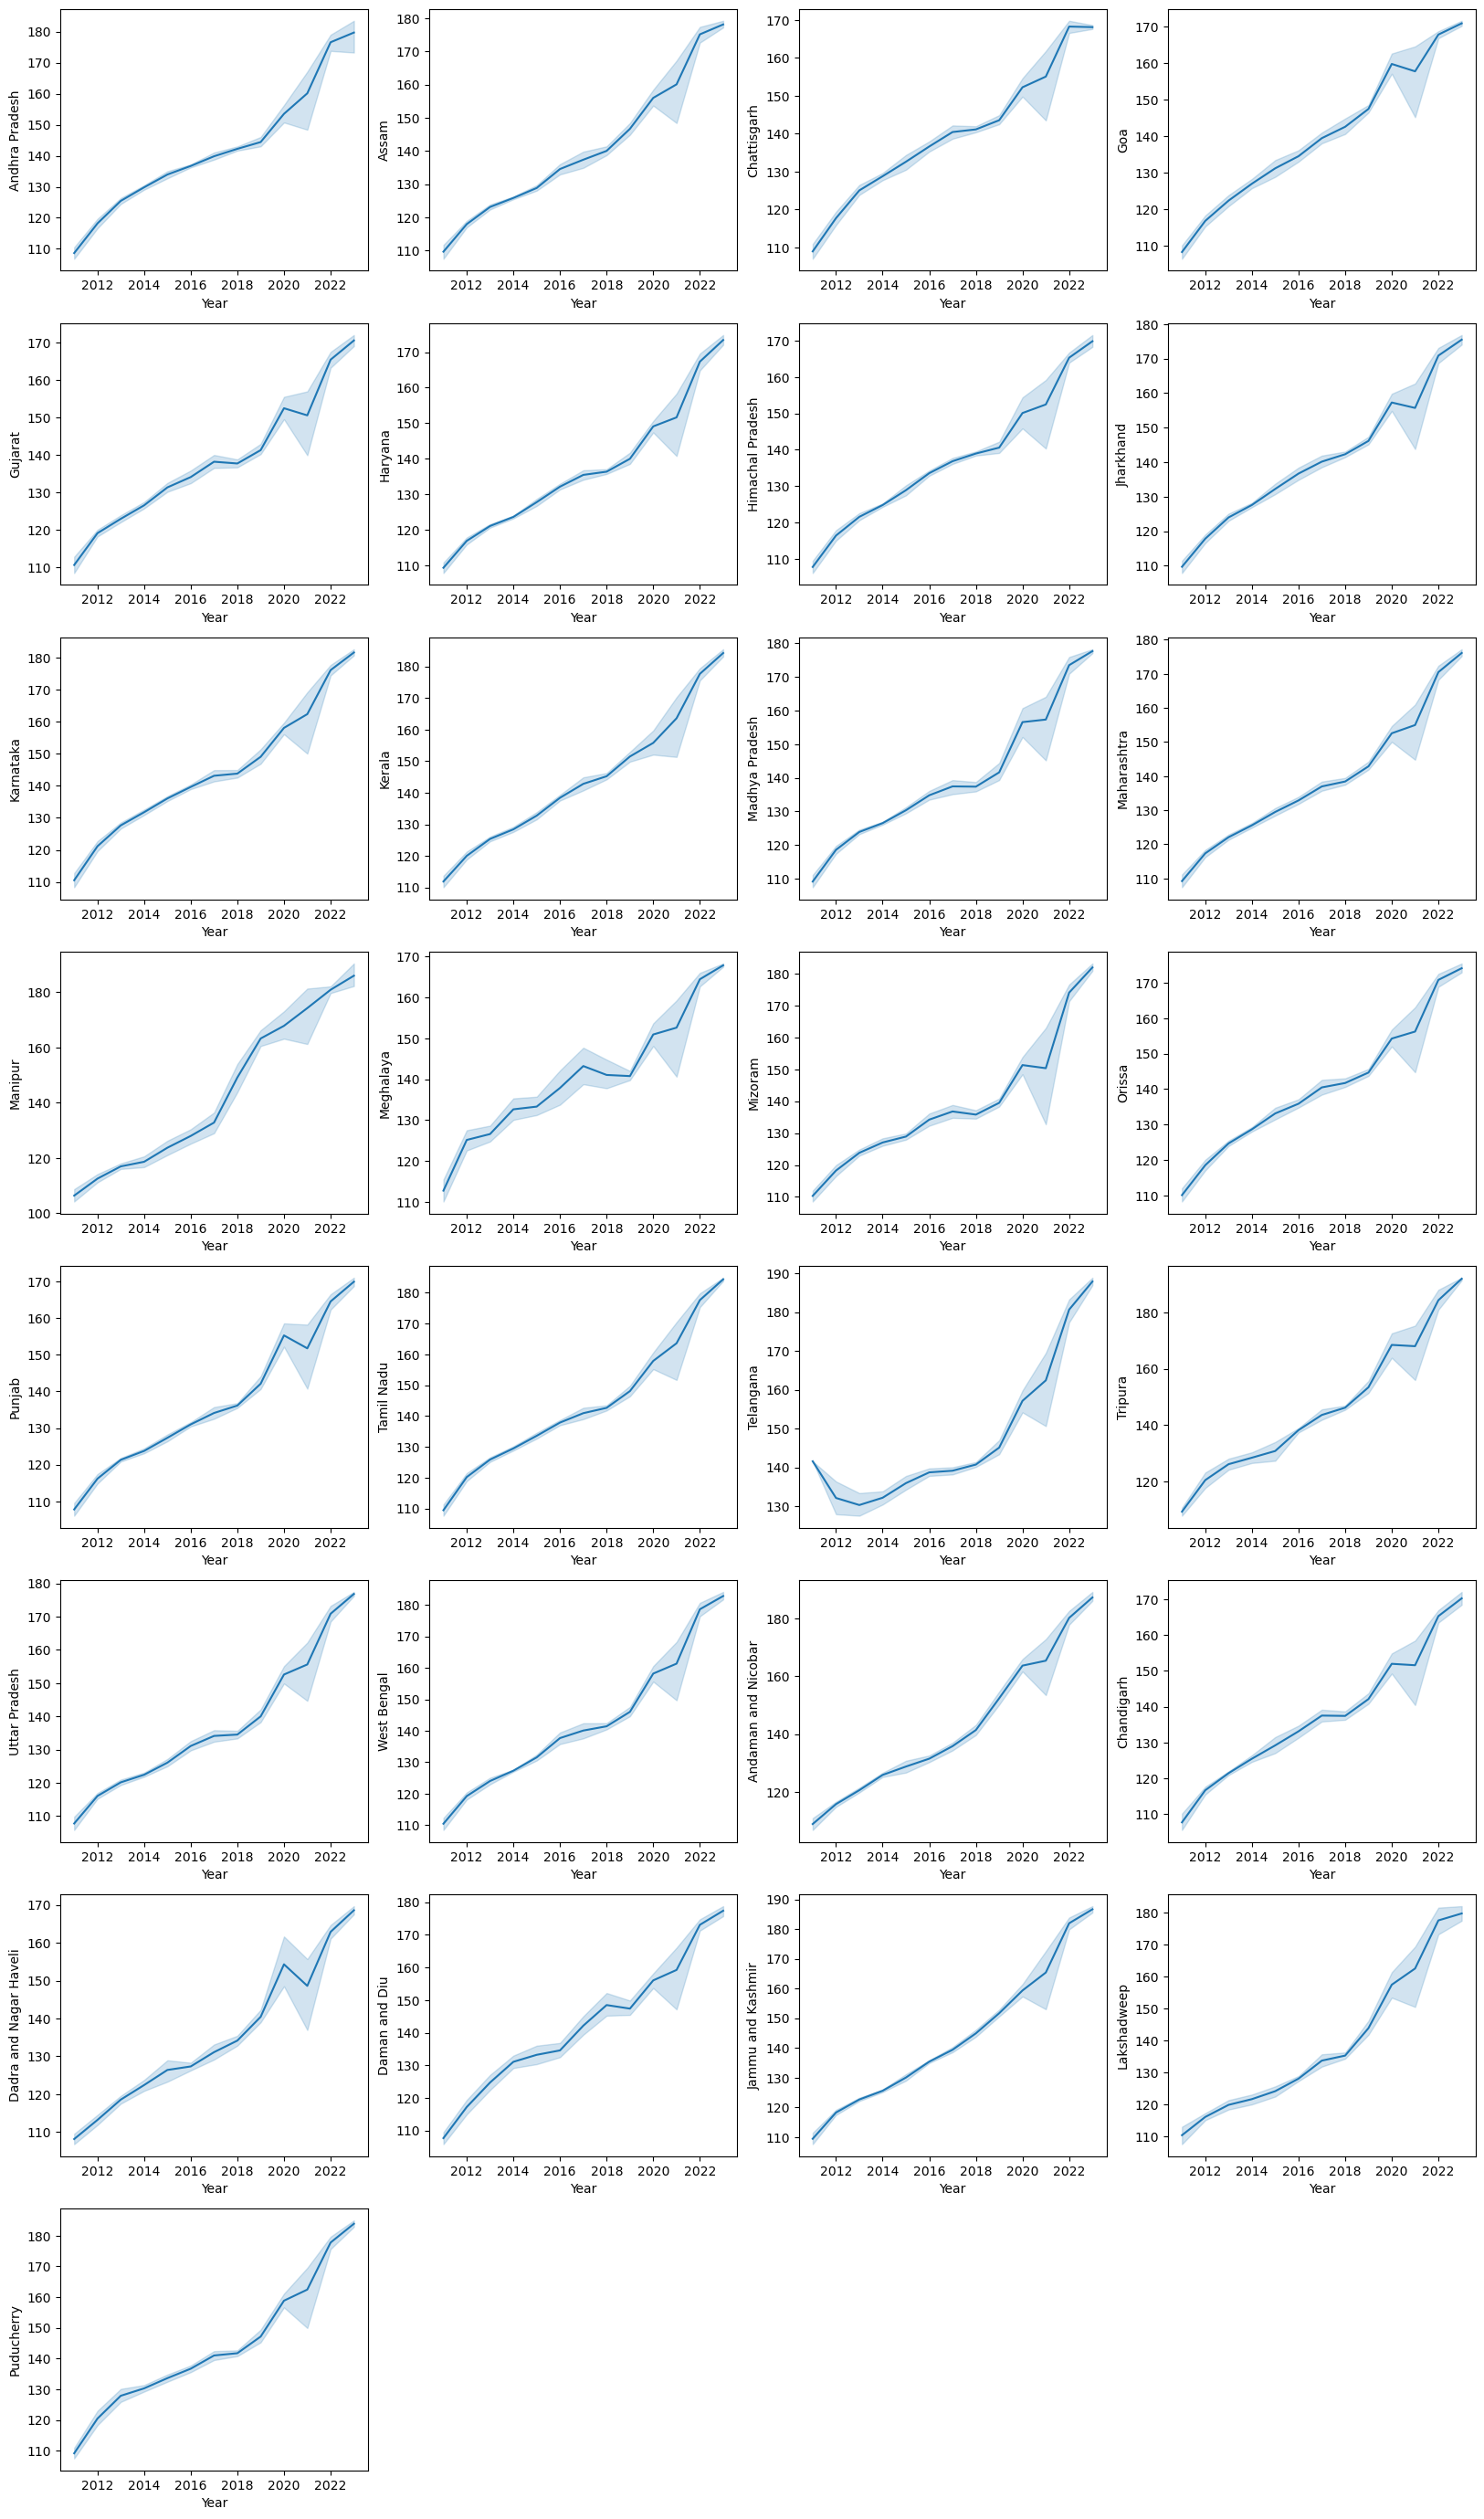

In [30]:
plt.figure(figsize=(20, 35))
for i, state in enumerate(states):
    plt.subplot(8, 4, i+1)
    sns.lineplot(data=data_year, x=data_year['Year'], y=state)
plt.show()

plotting the mean Consumer Price Index of each state for their corresponding year, we find a very similar trend being followed by all the states. all the states have had a gradual rise in CPI over the period. however certain observations are made as follows:
* **Telengana** has witnessed a dramatic drop in CPI from the year 2011 to 2013, after which it starts to follow the trend, but at a steeper level
* The states of **Gujarat**, **Goa**, **Jharkhand**, and **Dadra and Nagar Haveli** have a sharp incline in CPI in the year 2020 followed by a decline in the year 2021
* While **Jammu and Kashmir** have an almost linear incline in their CPI across the years, **Meghalaya** seems to have a very non-uniform incline

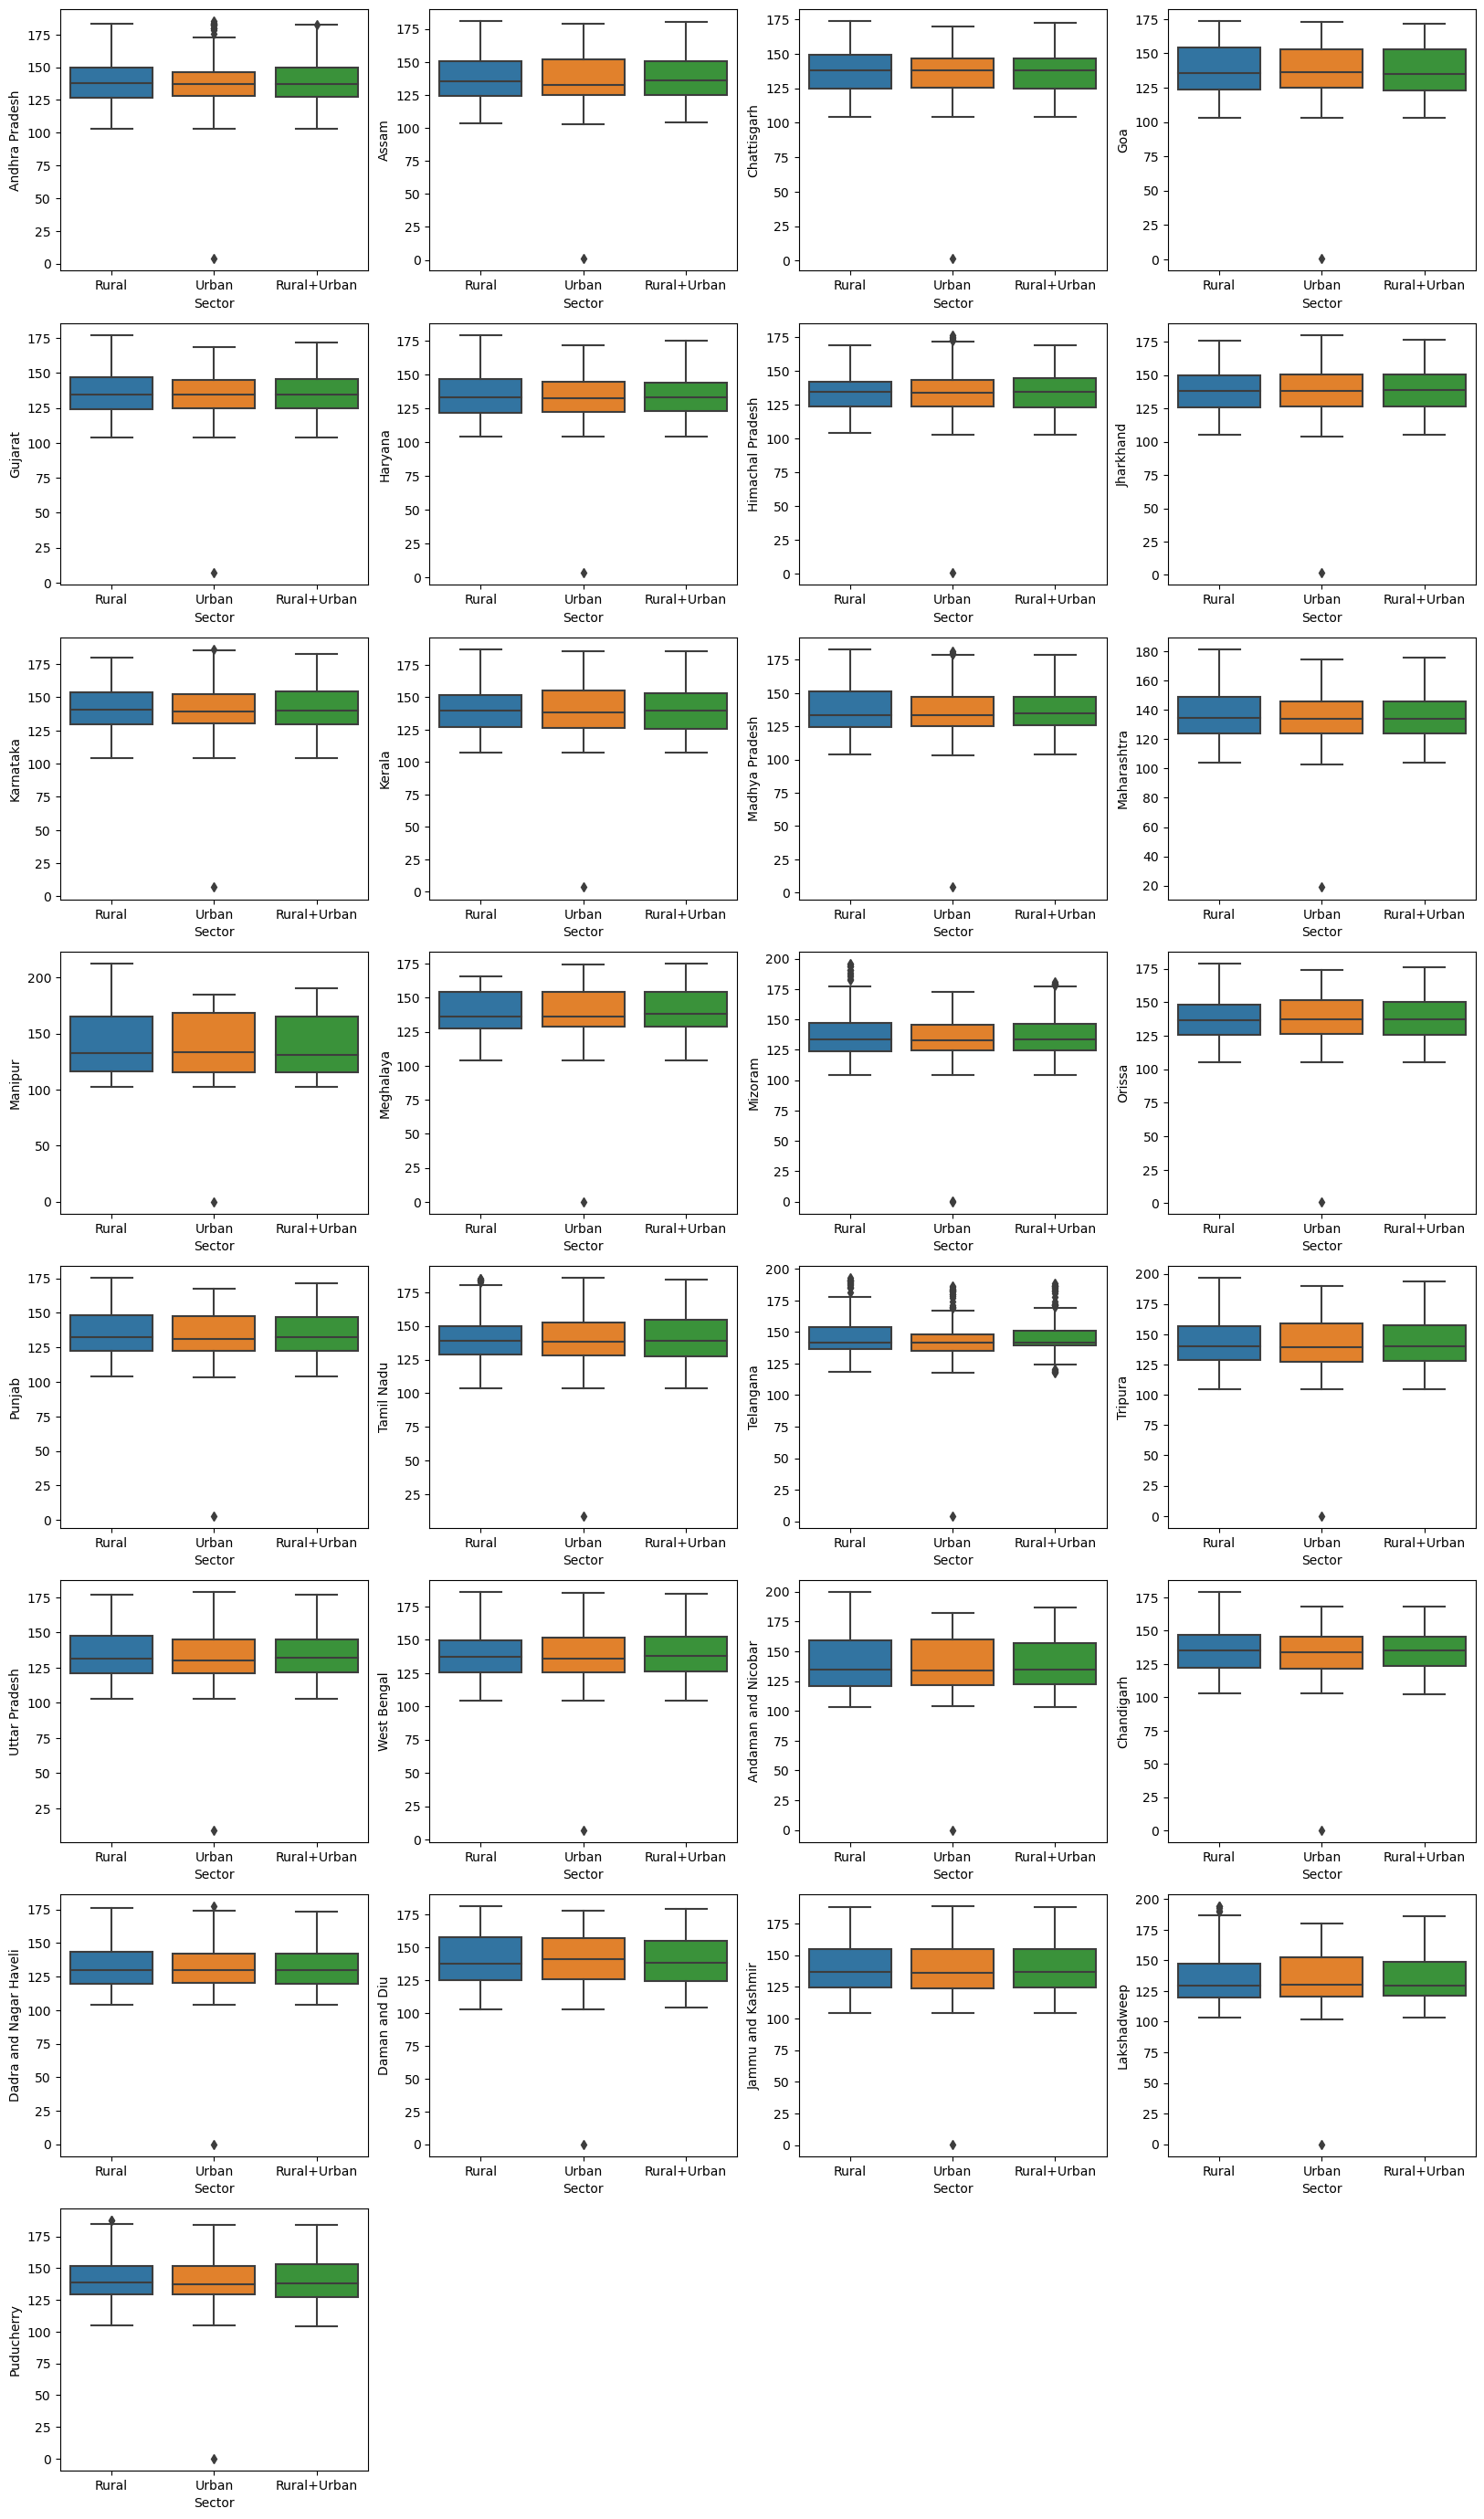

In [31]:
plt.figure(figsize=(20, 35))
for i, state in enumerate(states):
    plt.subplot(8, 4, i+1)
    sns.boxplot(data=data, x=data['Sector'], y=state)
plt.show()

plotting CPI of each state vs their sectors again show very similar patters with the following observations:
* almost all sectors of all the states lie between the mean CPI of 100-150, with their median between 125-150
* The state of **Manipur** has the highest spread/IQR across all sectors while the state of **Telengana** has the least spread/IQR across all states
* **Lakshwadeep** seems to be the only state with their rural sector having a significantly lower third quantile compared to the other sectors

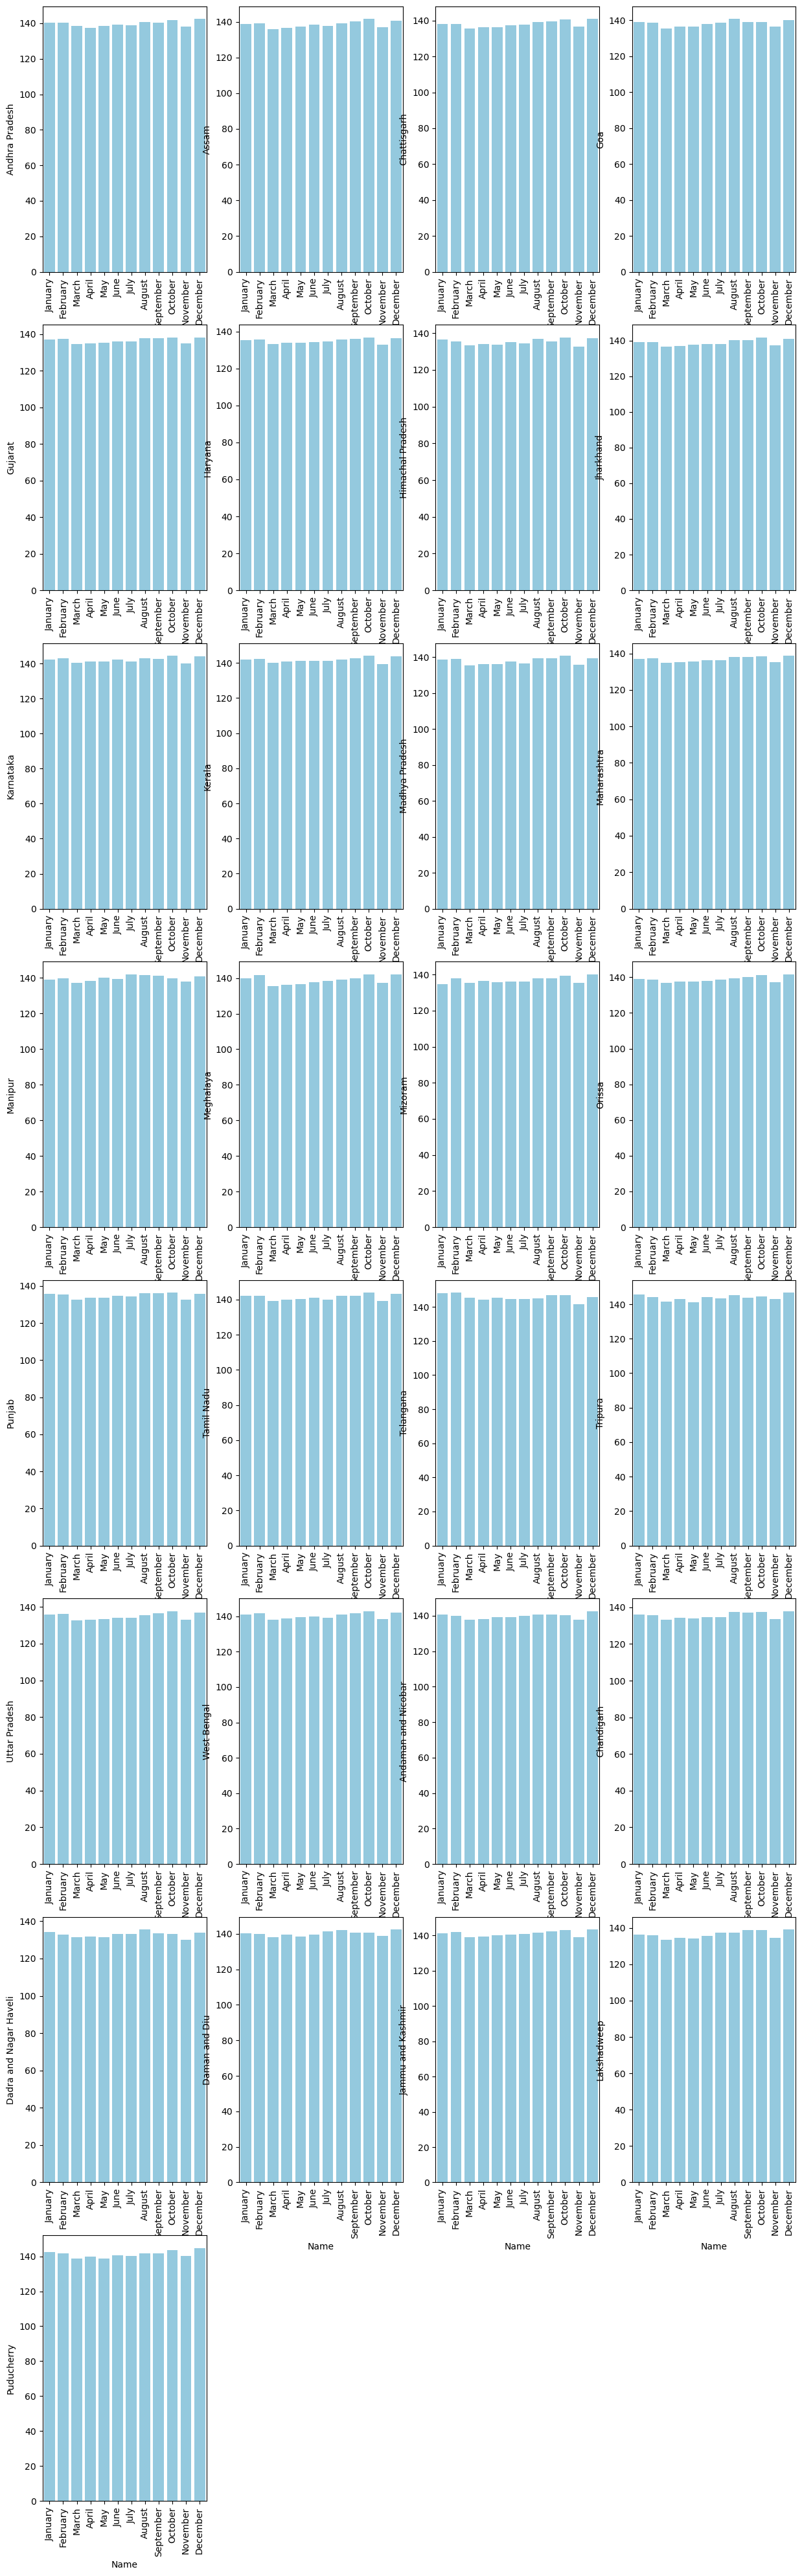

In [32]:
plt.figure(figsize=(15, 50))
for i, state in enumerate(states):
    plt.subplot(8, 4, i+1)
    sns.barplot(data=data_month, x=data_month['Name'], y=state, color='skyblue')
    plt.xticks(rotation=90)
plt.show()

all the states follow a similar trend across all the months. the following observations can be made from the abovep plots:
* almost all the states have a rise in CPI from **March** ad continue to rise till **October**
* November witnesses a drop in CPI in every state
* CPI again rises in **December**

## Multivariate Analysis

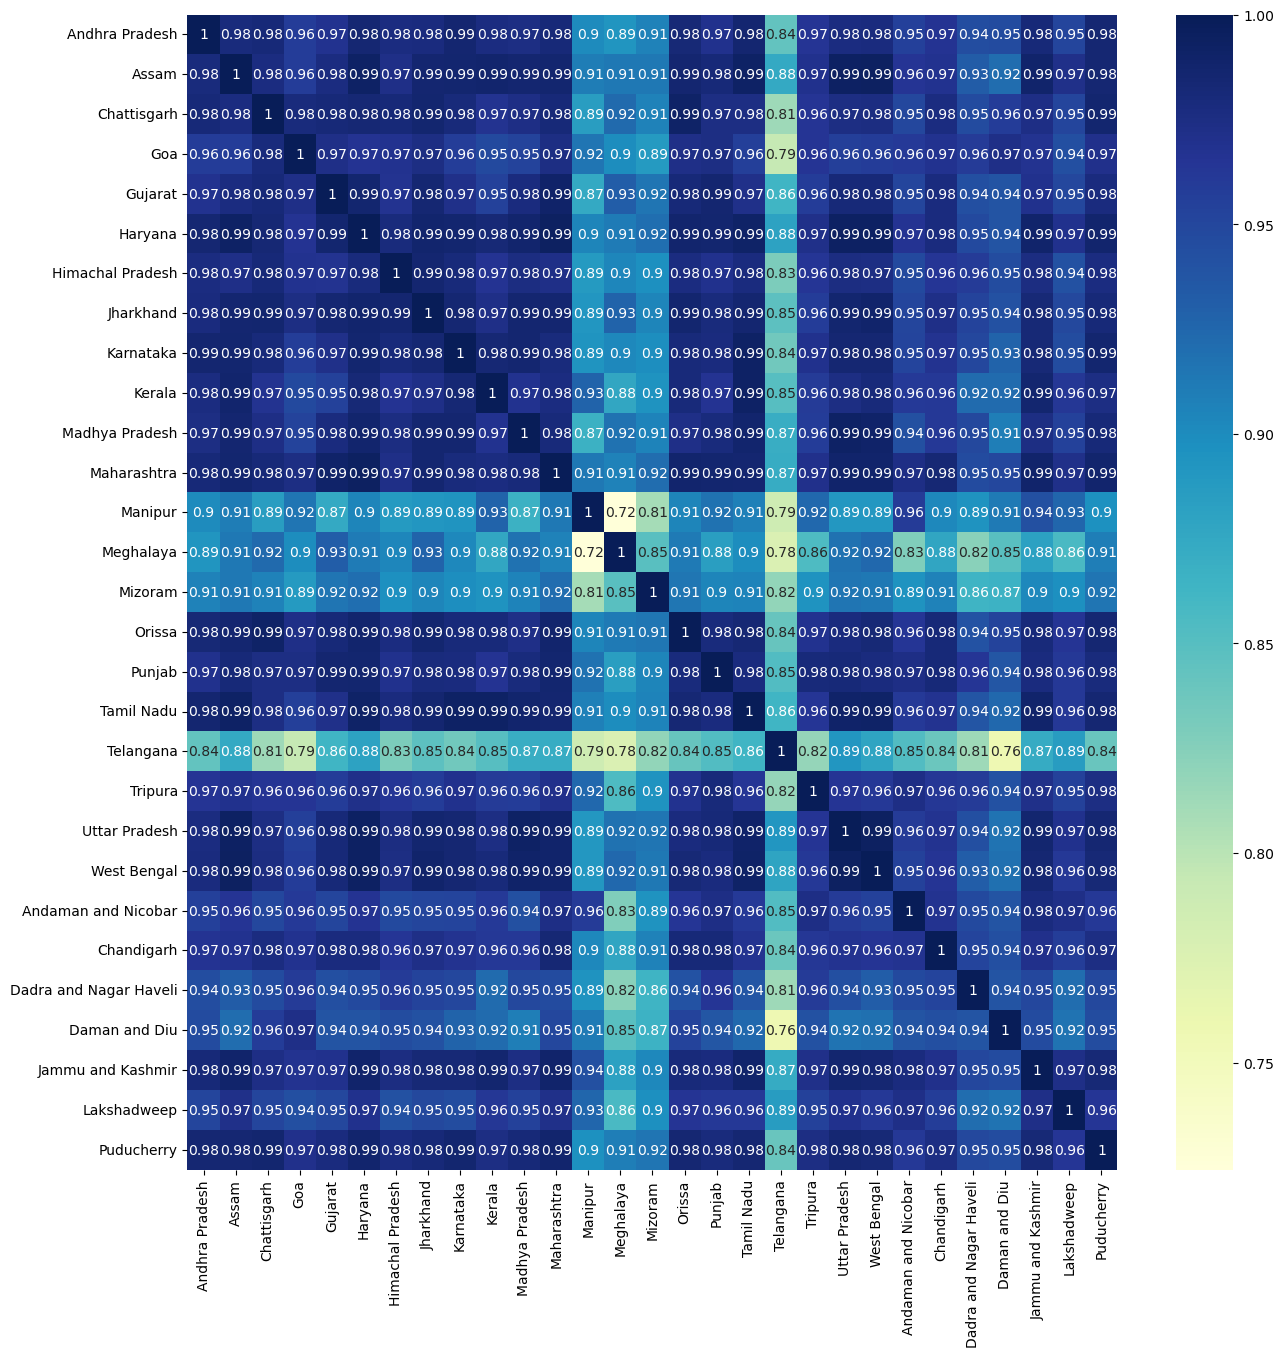

In [33]:
# Checking for any correlations between the states
plt.figure(figsize=(15,15))
sns.heatmap(data[states].corr(), cmap='YlGnBu', annot=True)
plt.show()

As is evident from the heatmap, all the states seem to be positively corelated with each other. however, the states of **Manipur**, **Mizoram**, **Meghalaya** and **Telengana** seem to have very low correlation with the other states, with telengana having the least correlation

In [34]:
data_month_sector = data.groupby(by=['Name', 'Sector'], as_index=False).mean()
data_month_sector.drop(columns=['Year'], inplace=True)

In [35]:
data_month_sector['Name'] = pd.Categorical(data_month_sector['Name'], categories=months_order, 
                                           ordered=True)
data_month_sector.sort_values(by='Name', inplace=True)
data_month_sector

Name       Sector  Andhra Pradesh       Assam  Chattisgarh  \
14    January        Urban      140.207692  139.361538   138.769231   
13    January  Rural+Urban      140.930769  138.800000   137.792308   
12    January        Rural      140.107692  138.238462   137.969231   
11   February        Urban      141.123077  139.492308   138.138462   
10   February  Rural+Urban      140.130769  138.707692   137.823077   
9    February        Rural      139.884615  138.607692   137.807692   
21      March        Rural      138.409091  136.681818   135.763636   
23      March        Urban      138.109091  134.909091   134.954545   
22      March  Rural+Urban      138.527273  135.845455   136.390909   
0       April        Rural      137.660000  136.310000   134.010000   
2       April        Urban      135.227273  135.890909   136.981818   
1       April  Rural+Urban      139.363636  137.909091   137.454545   
24        May        Rural      138.891667  137.666667   136.700000   
25        May  Rural+Urban      136.527273  135.945455   134.572727   
26        May        Urban      140.306667  138.273333   137.086667   
20       June        Urban      138.541667  138.033333   136.133333   
19       June  Rural+Urban      139.575000  138.100000   137.800000   
18       June        Rural      139.833333  138.541667   137.850000   
17       July        Urban      139.458333  137.116667   137.250000   
16       July  Rural+Urban      138.550000  139.241667   137.275000   
15       July        Rural      139.108333  136.716667   138.550000   
3      August        Rural      140.166667  139.358333   138.733333   
5      August        Urban      141.733333  138.841667   140.458333   
4      August  Rural+Urban      140.450000  139.350000   137.825000   
33  September        Rural      139.733333  139.250000   139.258333   
34  September  Rural+Urban      140.541667  140.625000   140.208333   
35  September        Urban      140.966667  140.208333   139.175000   
30    October        Rural      140.191667  141.233333   139.725000   
31    October  Rural+Urban      142.616667  142.641667   141.308333   
32    October        Urban      142.500000  140.525000   140.400000   
28   November  Rural+Urban      143.250000  141.791667   141.200000   
29   November        Urban      129.095000  126.532500   127.543333   
27   November        Rural      142.233333  142.141667   140.891667   
7    December  Rural+Urban      141.909091  141.618182   141.254545   
8    December        Urban      142.263636  139.336364   139.663636   
6    December        Rural      142.858333  140.800000   141.450000   

           Goa     Gujarat     Haryana  Himachal Pradesh   Jharkhand  ...  \
14  139.476923  137.169231  135.215385        136.923077  139.900000  ...   
13  139.030769  136.015385  135.192308        136.323077  139.092308  ...   
12  138.823077  137.953846  135.515385        136.223077  138.730769  ...   
11  138.484615  136.361538  135.607692        136.000000  140.023077  ...   
10  137.984615  137.507692  136.092308        134.546154  138.838462  ...   
9   139.230769  137.984615  135.669231        136.438462  139.046154  ...   
21  135.472727  134.636364  133.509091        133.118182  136.327273  ...   
23  134.981818  133.809091  132.245455        133.918182  136.872727  ...   
22  136.072727  135.272727  133.827273        133.509091  136.636364  ...   
0   133.850000  134.070000  133.370000        132.140000  134.690000  ...   
2   138.636364  134.090909  133.754545        135.581818  137.845455  ...   
1   137.000000  135.990909  135.136364        134.881818  138.472727  ...   
24  138.241667  136.541667  134.991667        133.266667  137.733333  ...   
25  133.236364  133.027273  131.536364        131.918182  135.381818  ...   
26  137.445833  136.210000  135.044167        136.061667  139.663333  ...   
20  136.958333  134.383333  133.800000        134.633333  138.275000  ...   
19  138.433333  137.325000  134.608333        135.500000  138.783333  ..

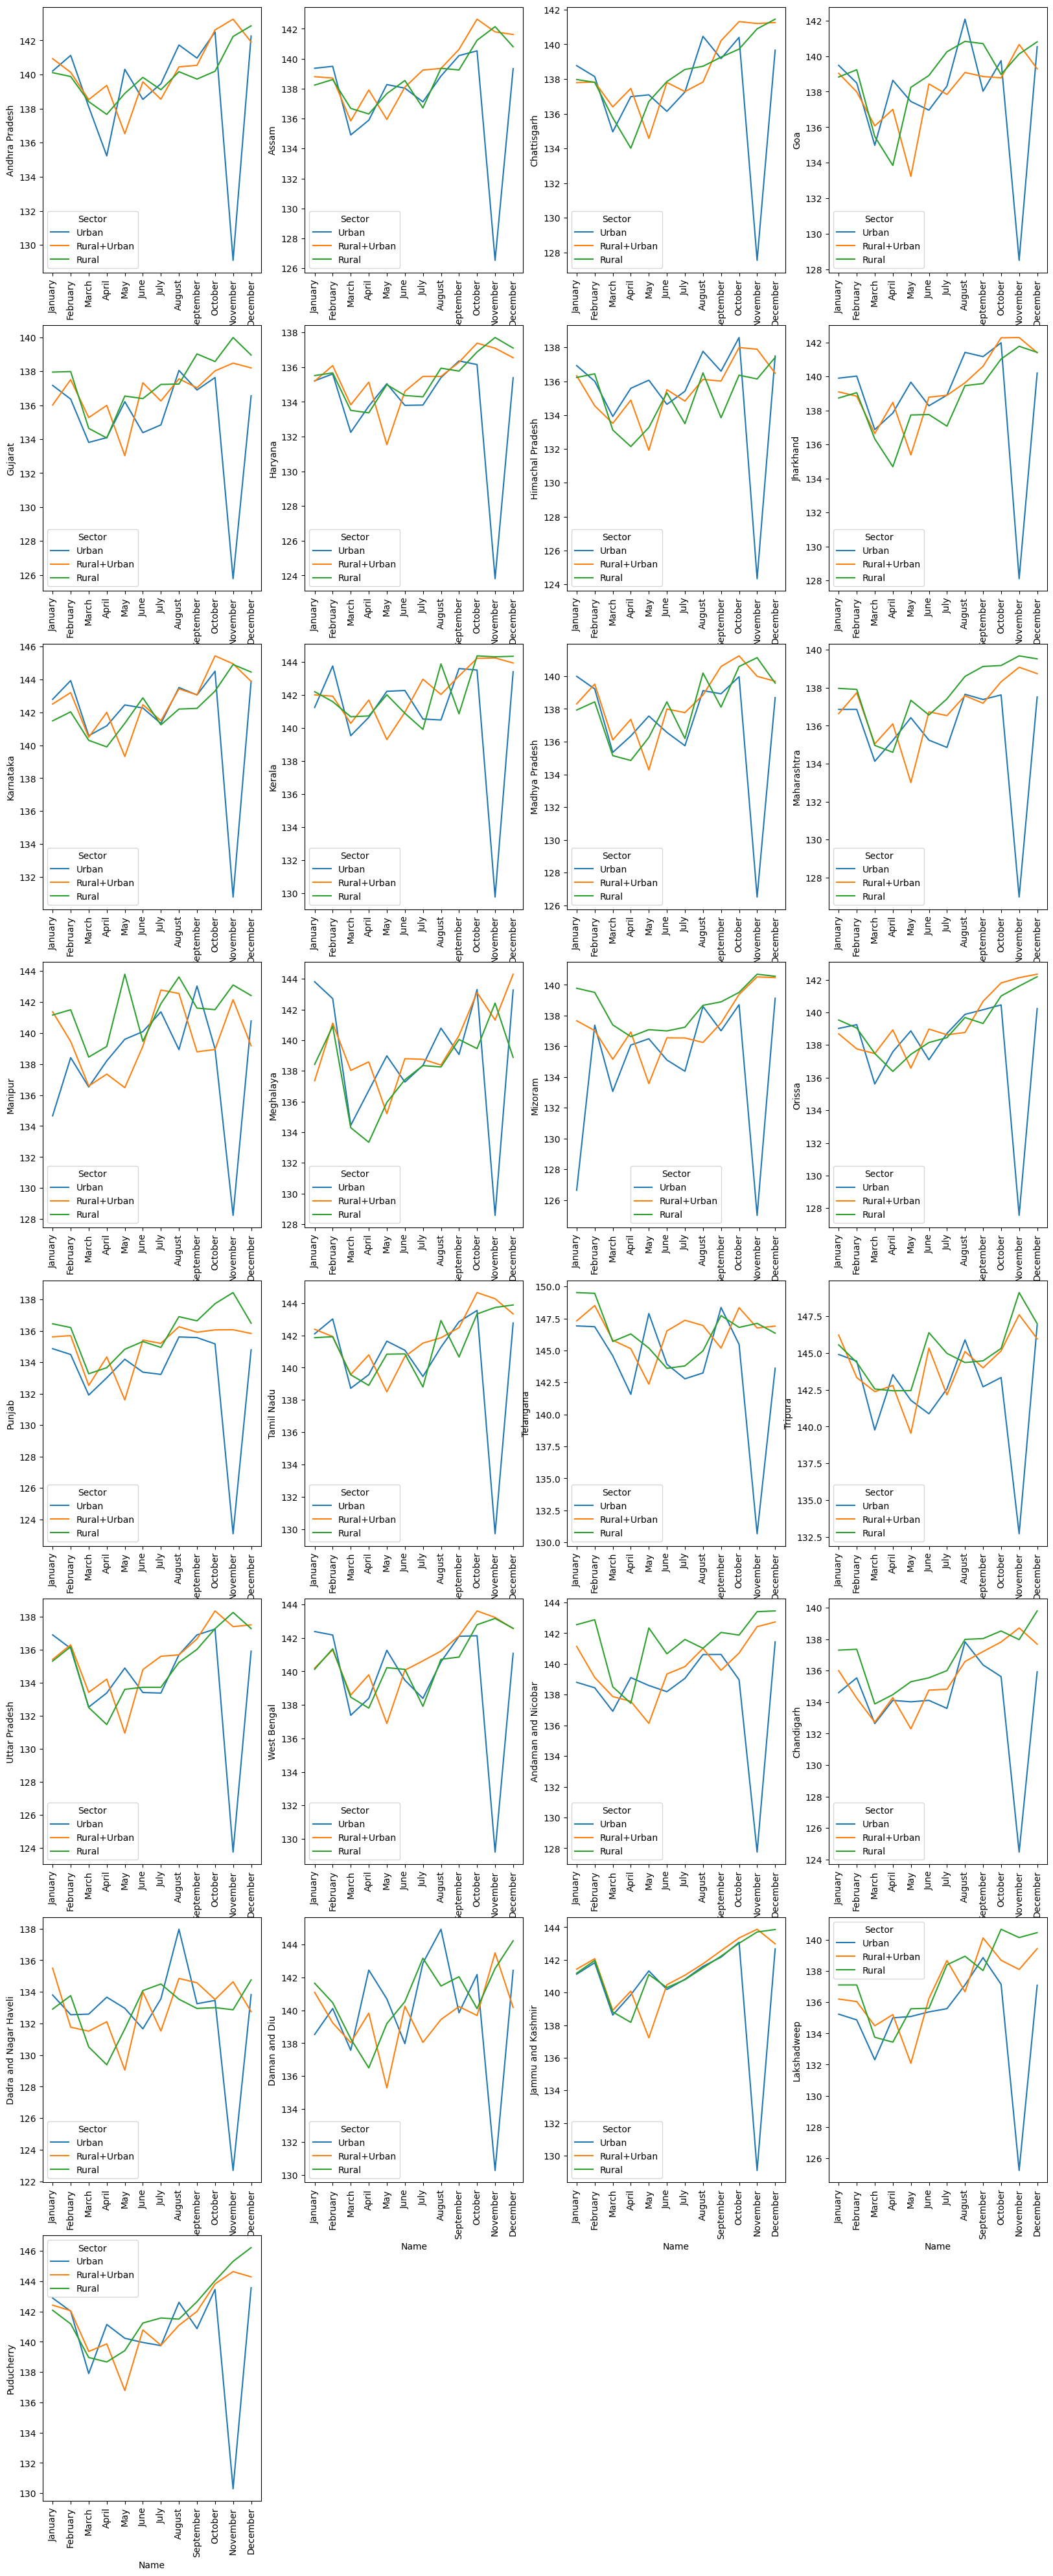

In [36]:
plt.figure(figsize=(20, 50))
for i, state in enumerate(states):
    plt.subplot(8, 4, i+1)
    sns.lineplot(x='Name', y=state, data=data_month_sector, hue='Sector')
    plt.xticks(rotation=90)
plt.show()

plotting CPI of the states vs months sector-wise give some very interesting observations. they are as follows:
* the CPI of all the states in every sector for every month follow a similar general trend
* the fluctuations of CPI in every state in urban sector is evidently more than the fluctuations seen by the rural and urban+rural sector
* the urban sector in every state witnesses a significant dive in CPI in the month of November, returning back to normality in **December**
* between the month of **April**-**June**, the CPI in the rural+urban sector of every state drops, while the urban sectors see a simultaneous rise
* urban sector in **Mizoram** in the month of **January** sees a drop comparative to the month of **November**
* from the month of **June**-**October**, all the sectors in **Jammu and Kashmir** see a collective and similar growth in CPI
* for majority of the months in almost every state, the urban and the rural+urban sectors seem to have a inverse effect on each other
* there is a significant rise in CPI in the urban sector in **August** for **Goa**, **Dadra and Nagar Haveli** and **Daman and Diu**

In [39]:
data_year_sector = data.drop(columns=['Name'])
data_year_sector = data_year_sector.groupby(by=['Year', 'Sector'], as_index=False).mean()
data_year_sector.head()

Year       Sector  Andhra Pradesh       Assam  Chattisgarh         Goa  \
0  2011        Rural      108.333333  109.200000   108.716667  107.900000   
1  2011  Rural+Urban      108.983333  109.608333   109.216667  108.558333   
2  2011        Urban      108.623333  110.265000   108.978333  108.195833   
3  2012        Rural      118.458333  117.725000   116.775000  116.150000   
4  2012  Rural+Urban      117.558333  118.266667   117.491667  116.375000   

      Gujarat     Haryana  Himachal Pradesh   Jharkhand  ...     Tripura  \
0  110.225000  108.858333        107.525000  109.525000  ...  109.033333   
1  110.833333  109.525000        107.983333  109.950000  ...  109.433333   
2  110.710000  109.585833        107.711667  109.688333  ...  109.642500   
3  118.383333  116.558333        115.433333  117.358333  ...  121.783333   
4  119.900000  117.050000        115.608333  117.925000  ...  119.475000   

   Uttar Pradesh  West Bengal  Andaman and Nicobar  Chandigarh  \
0     107.341667   109.775000           109.075000  107.525000   
1     107.833333   110.733333           108.883333  107.816667   
2     108.078333   110.871667           108.667500  107.974167   
3     114.933333   118.675000           115.233333  116.383333   
4     116.458333   119.941667           114.591667  115.591667   

   Dadra and Nagar Haveli  Daman and Diu  Jammu and Kashmir  Lakshadweep  \
0              108.166667     107.441667         109.183333   109.933333   
1              108.366667     107.833333         109.700000   110.125000   
2              107.952500     107.760000         109.455000   111.055833   
3              113.708333     117.508333         118.066667   114.616667   
4              110.916667     115.841667         118.466667   115.191667   

   Puducherry  
0  109.033333  
1  109.533333  
2  108.894167  
3  120.775000  
4  119.466667  

[5 rows x 31 columns]

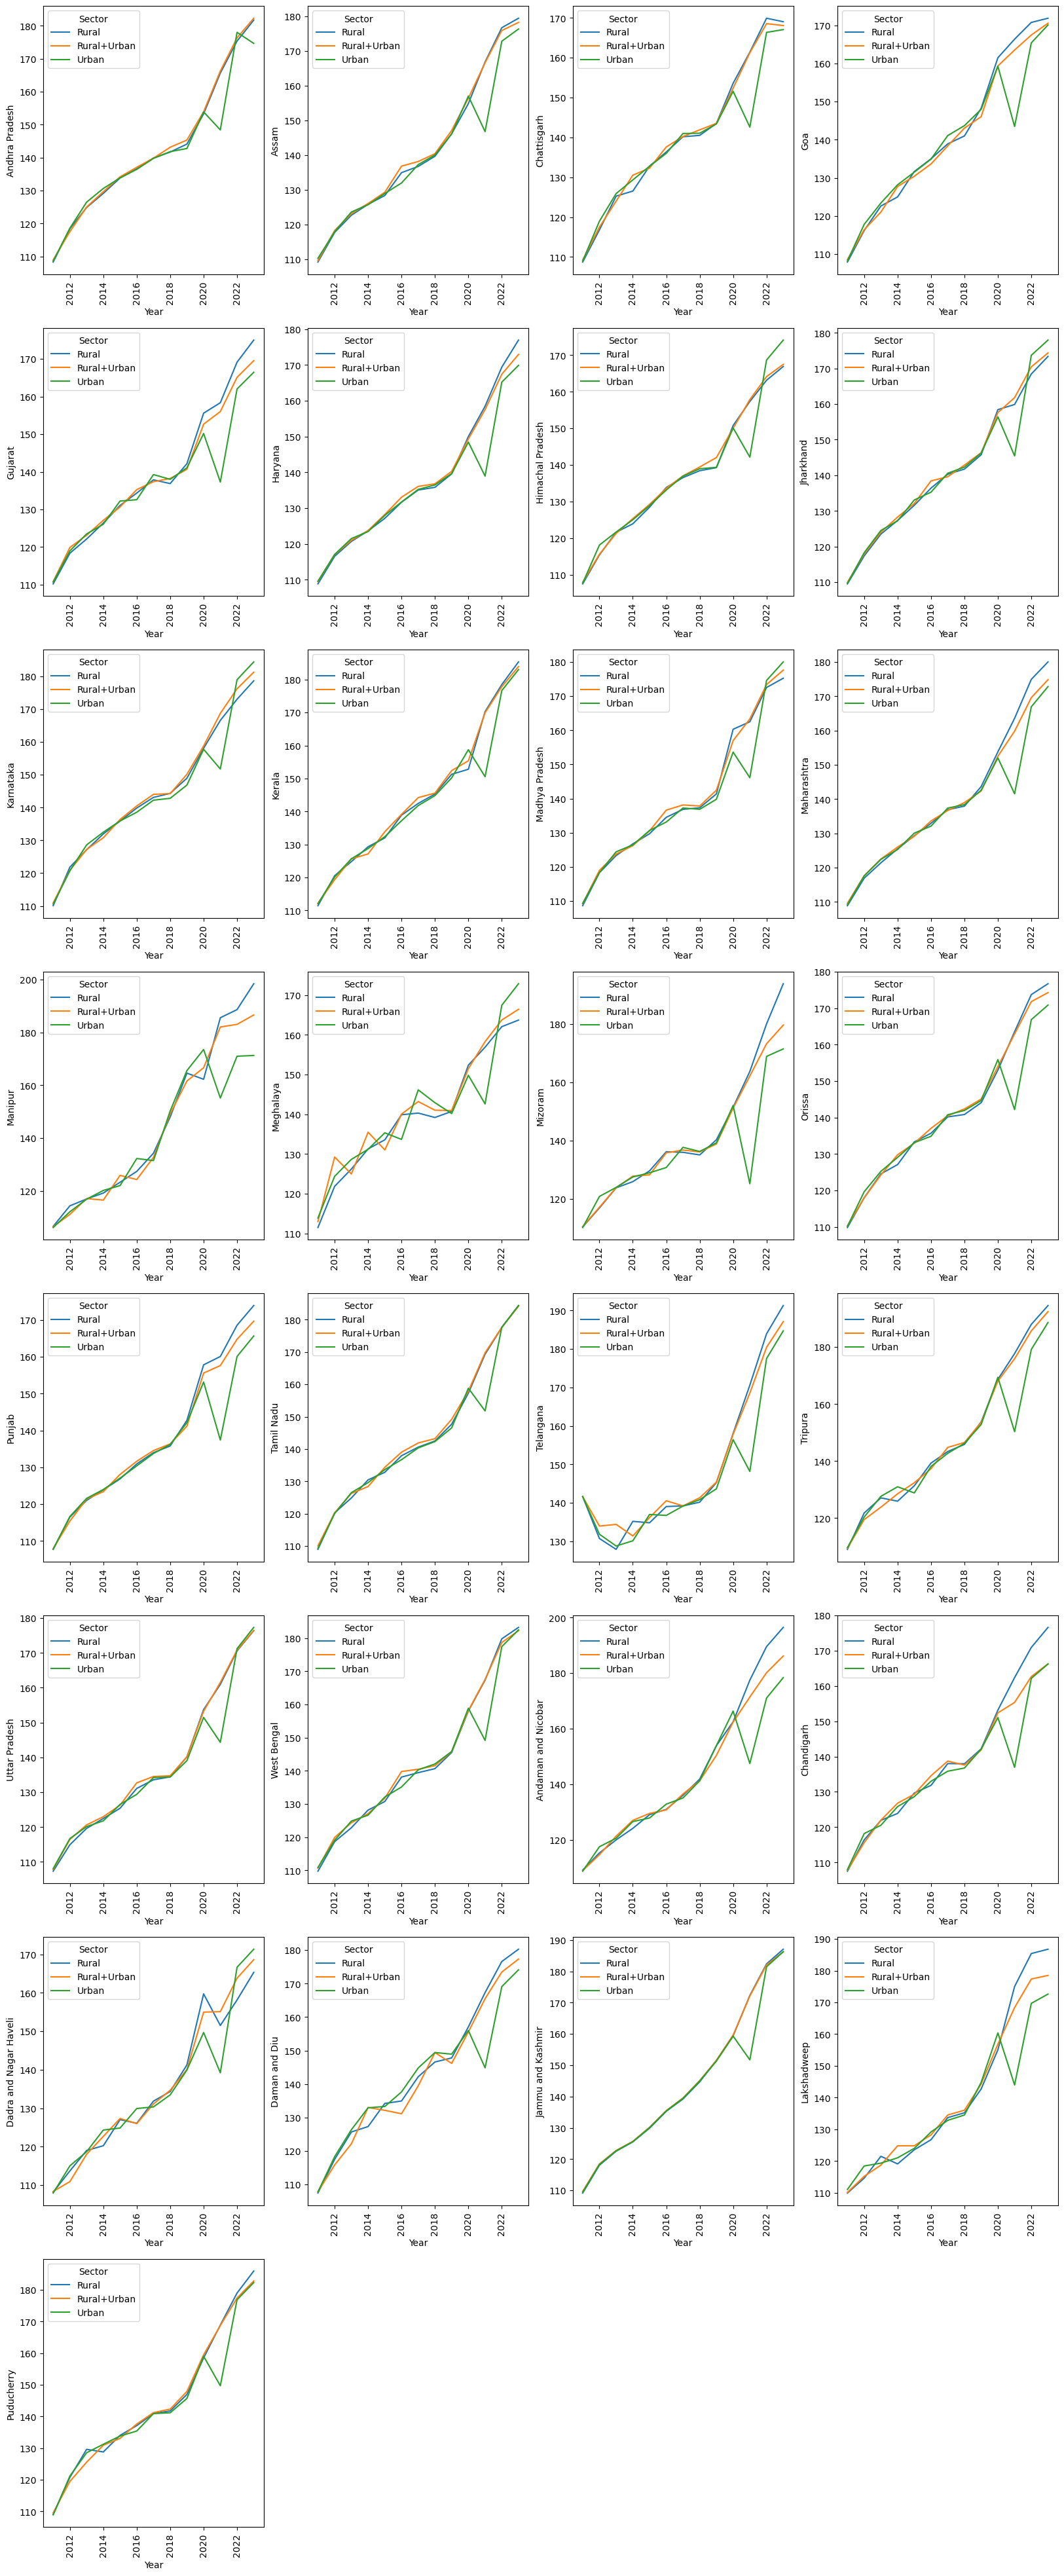

In [41]:
plt.figure(figsize=(20, 50))
for i, state in enumerate(states):
    plt.subplot(8, 4, i+1)
    sns.lineplot(x='Year', y=state, data=data_year_sector, hue='Sector')
    plt.xticks(rotation=90)
plt.show()

plotting CPI of the states vs year, sector-wise give some very interesting observations. they are as follows:
- all the states(except **Telengana**) has had a very steady rise in their CPI over the year in every sector
- urban sector of all the states have seen a massive dip in their CPI in the year 2021, while the rural and rural+urban sector have seen a normal rise or more
- the urban sector of **Mizoram** seem to have the lowest dip in their CPI of all the states and sectors, while **Mizoram**'s rural sector has witnessed a relatively steep rise.
- except for the year of 2021, all the sectors in **Jammu and Kashmir** seem to have had the exact similar rise in their CPI over the years
- the state of **Meghalaya** seems to have the highest irregular rise in the CPI of all the states